In [59]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
df = pd.read_csv("loan_default_risk_dataset.csv")

In [61]:
df.head()

,Retirement_Age,Debt_Amount,Monthly_Savings,Loan_Default_Risk
0,60.0,2996.52,2378.49,0
1,66.4,4137.23,1538.92,1
2,58.5,19865.75,2434.80,1
3,49.8,16855.70,2677.82,1
4,67.3,7902.37,2206.72,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Retirement_Age     300 non-null    float64
 1   Debt_Amount        299 non-null    float64
 2   Monthly_Savings    298 non-null    float64
 3   Loan_Default_Risk  300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 9.5 KB


In [63]:
df=df.dropna()

In [64]:
X = df.drop('Loan_Default_Risk',axis=1)
y = df.Loan_Default_Risk

In [65]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [66]:
num_cols = xtrain.select_dtypes(include='number').columns
cat_cols = xtrain.select_dtypes(exclude='number').columns

Checking outliers in numerical columns

<Axes: >

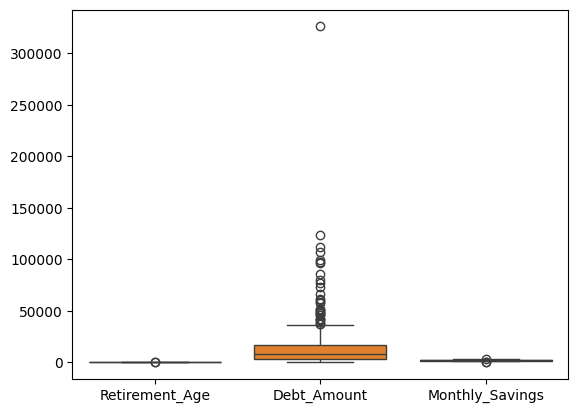

In [67]:

sns.boxplot(df[num_cols])

WE HAVE OUTLIERS SO WE GO FOR ROBUST SCALER AS IT HANDLES OUTLIERS AS IT CONTAINS MEDIAN AND IQR 

In [68]:
# CATEGORICAL COLUMNS CHECKING FOR UNIQUE VALUES 
def cat_cols_nunique(cols):
    for col in cols:
        print(f'{col} - {df[col].nunique()}')

cat_cols_nunique(cat_cols)

(VERY IMPORTANT)  
WE USE PIPELINES INSIDE COLUMN TRANSFORMERS WHEN WE NEED TO APPLY MULTIPLE PREPROCESSING ON THE SAME DATA 

In [69]:
from sklearn.preprocessing import OrdinalEncoder


preprocessing = ColumnTransformer(
    transformers= [
        ('scaler',RobustScaler(),num_cols),
        ('onehotencoder',OneHotEncoder(sparse_output=False , handle_unknown='ignore'),cat_cols),
    ]
)

# DECISION TREE

In [70]:
pipeline = Pipeline (
    steps = [
        ('preprocessing',preprocessing),
        ('model',DecisionTreeClassifier())
    ]
)

In [71]:
pipeline.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [72]:
pipeline.predict(xtest)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [73]:
pipeline.score(xtrain,ytrain)

1.0

In [74]:
pipeline.score(xtest,ytest)

0.9166666666666666

DECISION TREE ALWAYS SPLITS INTO 2 PARTS , SO ONE HOT ENCODING IS GOOD IN THIS SCENARIO

- Decision tree leads to overfitting , performs well on train and does not perform well on test

# LOGISTIC REGRESSION ON SAME 

In [75]:
pipeline1 = Pipeline (
    steps = [
        ('preprocessing',preprocessing),
        ('Logistic regression',LogisticRegression())
    ]
)

In [76]:
pipeline1.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('Logistic regression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('scaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [77]:
pipeline1.score(xtrain,ytrain)

0.9957805907172996

In [78]:
pipeline1.score(xtest,ytest)

1.0

Criterion: 

gini- can handle most of the scenarion
here we donot calculate logarith
directly we calculate probability
it reduces time 


entropy - we calculate logarithmic 

--------------------------------------------------------------------------------------------------------------------------

splitter -
best - check for all the posibilities and picks the best one (information gain- the best one is the one having the highest value , gini impurity - the best one is the one having the lowest value )

random - it will randomly select 1 split and it will assumne that as the best split it will not check for information gain(after selecting randomly then it will simply check internally to find the threshold )


RANDOM IS USED IN ENSEMBLE TREES AS IT IS DIFFICULT TO USE BEST , IN ENSEMPLE RANDOMLY IT SELECTS THE BEST ONT TO REDUCE THE TIME

--------------------------------------------------------------------------------------------------------------------------

max depth - handle the level of depth in the trees 
none - go till the last

max depth none will lead to overfitting 

we will not use less numbers we go for 100,150 (none,10,50,100,200)

if we use very less values then it will lead to underfitting



sub nodes also called as decision nodes from this we go for leaf node 

--------------------------------------------------------------------------------------------------------------------------

minimum sample split -

default : float = 2



MIMIMUM SAMPLE SPLIT AND MINIMUM SAMPLE LEAF WORKS TOGETHER 
- It checks for minimum sample split with the root node or main node which is going to split and minimum sample leaf will be compared with both left and right node if both are satisfied then it is considered 

`IMG 2`

 -------------------------------------------------------------------------------------------------------------------------

minimum sample leaf:

default : float = 1

--> This will allow to split the nodes if the both left and right  leaf nodes values contain values <= the minimum sample leaf 

--> If any of them is false i.e, less than minimum sample leaf then it will regect it and gives the conclusion at the spot without splitting

`IMG 1`

--------------------------------------------------------------------------------------------------------------------------

max_features : none(always it selects first feature )

none by default 

- to select root node it will check for all the features
when we have more features we use square root(500+ or 1000 features)
we use none when we have small dataset

in sqrt it will give a value for example : number of features =4 and sqrt of 4 is 2 , it will select randomly 2 features (since this is selected randomly we use random_state to get the same 2 random features everytime ) (after selecting the 2 it will check the information gain and on the basis of this it selects the best one )


here we should not take 1,3 like this random values 

MAX FEATURES AND RANDOM_STATE WORKS TOGETHER

class_weight : used for imbalanced data , balanced or none 

USE WITH GRID SEARCH CV